In [8]:
import sqlite3
from contextlib import closing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DB = "../data/db/nikkeiscrape.db"

In [60]:
def select(code):
    with closing(sqlite3.connect(DB)) as conn:
        try:
            c = conn.cursor()
            sql = "SELECT * FROM code_{}".format(code)
            result = pd.read_sql_query(sql, conn)
            result["date"] = pd.to_datetime(result["date"], format="%Y-%m-%d")
            result = result.sort_values("date")
            result = result.set_index("date")
        except sqlite3.Error:
            return None
    return result

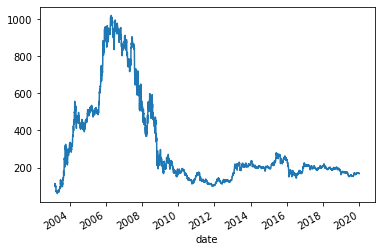

In [61]:
data_8411 = select(8411)
data_8411 = data_8411[data_8411.index < "2020-01-01"]
data_8411["open"].plot()

In [62]:
data_8411["sma_5"] = data_8411["close"].rolling(5).mean()

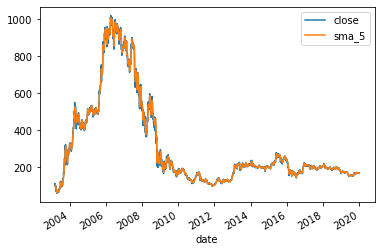

In [63]:
data_8411[["close", "sma_5"]].plot()

In [64]:
data_8411["close"].ewm(5, adjust=True).mean()

date
2003-03-12    106.000000
2003-03-13    109.272727
2003-03-14    108.373626
2003-03-17    105.066468
2003-03-18    102.846614
                 ...    
2019-12-24    169.432275
2019-12-25    169.093562
2019-12-26    168.877968
2019-12-27    168.898307
2019-12-30    168.798589
Name: close, Length: 4105, dtype: float64

In [68]:
weight = 15
weights = [1,2,3,4,5]
data_8411["close"].rolling(5).apply(lambda x: np.average(x, weights=weights))

date
2003-03-12           NaN
2003-03-13           NaN
2003-03-14           NaN
2003-03-17           NaN
2003-03-18    101.926667
                 ...    
2019-12-24    168.900000
2019-12-25    168.246667
2019-12-26    167.946667
2019-12-27    168.206667
2019-12-30    168.246667
Name: close, Length: 4105, dtype: float64

In [71]:
data_8411["close"].shift(5)

date
2003-03-12      NaN
2003-03-13      NaN
2003-03-14      NaN
2003-03-17      NaN
2003-03-18      NaN
              ...  
2019-12-24    171.0
2019-12-25    170.7
2019-12-26    170.2
2019-12-27    169.2
2019-12-30    168.7
Name: close, Length: 4105, dtype: float64